In [ ]:
## 26.08.2025
## 1- popular-based recommendation system
## 2- content-base recommendation
## 3-collabrative-based recommendation

# Import Libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import  drive,files
drive.mount("/content/drive")
files.upload()

Mounted at /content/drive


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oula23","key":"23097febc5c9b1ac6a4b70d11ff71f01"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download samlearner/letterboxd-movie-ratings-data


Dataset URL: https://www.kaggle.com/datasets/samlearner/letterboxd-movie-ratings-data
License(s): Attribution 4.0 International (CC BY 4.0)
 67% 126M/188M [00:00<00:00, 1.31GB/s]
100% 188M/188M [00:00<00:00, 1.10GB/s]


In [5]:
import zipfile

with zipfile.ZipFile('/content/letterboxd-movie-ratings-data.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/temp')

# Movie Dataset

In [6]:
movie_dataset=pd.read_csv("/kaggle/temp/movie_data.csv",engine="python")

In [ ]:
movie_dataset.shape

(285963, 19)

In [ ]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285963 entries, 0 to 285962
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _id                   285963 non-null  object 
 1   genres                274986 non-null  object 
 2   image_url             264521 non-null  object 
 3   imdb_id               243898 non-null  object 
 4   imdb_link             243914 non-null  object 
 5   movie_id              285616 non-null  object 
 6   movie_title           283453 non-null  object 
 7   original_language     274986 non-null  object 
 8   overview              261362 non-null  object 
 9   popularity            274872 non-null  float64
 10  production_countries  274854 non-null  object 
 11  release_date          270954 non-null  object 
 12  runtime               269943 non-null  float64
 13  spoken_languages      274758 non-null  object 
 14  tmdb_id               279803 non-null  float64
 15  

In [ ]:
# remove unwanted columns
movie_dataset.drop(["imdb_link","image_url","tmdb_link"],inplace=True,axis=1)

In [ ]:
movie_dataset["overview"][10]

"Hookers are being killed all over the place, their bodies dumped in various parts of the city. Now, it's up to Officer Kelly Anderson with the help of Detective Grant Jordan to go undercover as a hooker to stop these horrific killings."

In [ ]:
movie_dataset.head(5)

,_id,genres,imdb_id,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],tt0586129,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",tt0045731,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",tt0187327,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",tt4769914,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,0.0,0.0,2018.0


# Ratings Dataset

In [7]:
ratings_dataset=pd.read_csv("/kaggle/temp/ratings_export.csv")
ratings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11078167 entries, 0 to 11078166
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   movie_id    object
 2   rating_val  int64 
 3   user_id     object
dtypes: int64(1), object(3)
memory usage: 338.1+ MB


In [ ]:
ratings_dataset

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof
...,...,...,...,...
11078162,6239f4f1a936b95600b3d798,alien-3,6,turnitip
11078163,6239f4f1a936b95600b3d799,battleship-potemkin,7,turnitip
11078164,6239f4f1a936b95600b3d79e,pusher,6,turnitip
11078165,6239f4f1a936b95600b3d7a1,wild-strawberries,7,turnitip


In [8]:

## take random samples from datasets
import random
SAMPLE_SIZE=300000
random.seed(72)
indices = random.sample(range(len(ratings_dataset)), SAMPLE_SIZE)
indices.sort()
#movie_dataset=movie_dataset.loc[indices]

In [9]:
ratings_dataset=ratings_dataset.loc[indices]

In [ ]:
ratings_dataset.shape

(300000, 4)

# Users Datasets

In [ ]:
users_dataset=pd.read_csv("/kaggle/temp/users_export.csv")
users_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8139 entries, 0 to 8138
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                8139 non-null   object 
 1   display_name       7832 non-null   object 
 2   num_ratings_pages  4747 non-null   float64
 3   num_reviews        8139 non-null   int64  
 4   username           8139 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 318.1+ KB


In [ ]:
users_dataset.head(5)

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy


In [ ]:
users_dataset[users_dataset["username"]=="deathproof"]

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof


# popularity-based recommendation

In [ ]:
popular_movie_dataset=movie_dataset[(movie_dataset["vote_count"]>100)&(movie_dataset["vote_average"]>6)]

In [ ]:
popular_movie_dataset.shape

(10675, 16)

In [ ]:
# the most popular movie names
popular_movie_dataset=popular_movie_dataset[['movie_title',"vote_average","vote_count","movie_id"]].sort_values(by="vote_count",ascending=False)

In [ ]:
popular_movie_dataset.shape

(10675, 4)

In [ ]:
popular_movie_dataset.head(5)

,movie_title,vote_average,vote_count,movie_id
42305,Inception,8.3,30211.0,inception
40625,Interstellar,8.3,27020.0,interstellar
82155,The Dark Knight,8.5,26173.0,the-dark-knight
18551,Deadpool,7.6,25753.0,deadpool
64959,The Avengers,7.7,25672.0,the-avengers-2012


In [ ]:
## the most popular movies that the user hasnt seen

seen_movie_ids=ratings_dataset[ratings_dataset["user_id"]=="adrianbalboa"]["movie_id"]

def get_unseen_popular_movies(user_id,popular_movie_dataset):
  seen_movie_list=ratings_dataset[ratings_dataset["user_id"]==user_id]["movie_id"].values.tolist()
  popular_seen_movies=popular_movie_dataset[popular_movie_dataset["movie_id"].isin(seen_movie_list)]
  popular_unseen_movies=popular_movie_dataset.drop(popular_seen_movies.index,axis=0)
  print("Most popular unseen Movies -User Specific-")
  return popular_unseen_movies["movie_id"].values.tolist()[0:5]

def get_all_users_unseen_popular_movies():
  pass


# Weighted Average

In [ ]:
v=movie_dataset['vote_count']
R=movie_dataset["vote_average"]
C=movie_dataset["vote_average"].mean()
m=movie_dataset["vote_count"].quantile(0.70)


In [ ]:
movie_dataset["weighted_average"]=((R*v)+(C*m))/(v+m)

In [ ]:
ranking=movie_dataset.sort_values(by="weighted_average",ascending=False)
print("Top movies by Weighted Average :\n")
ranking[["movie_title","weighted_average"]].iloc[0:5]

Top movies by Weighted Average :



,movie_title,weighted_average
106249,Bring the Soul: The Movie,9.196789
198291,Burn the Stage: The Movie,9.103281
193354,Break the Silence: The Movie,8.975981
99044,Franco Escamilla: Por La Anécdota,8.875887
226315,Franco Escamilla: Por La Anécdota,8.875887


# Content-Based Filtering

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer=TfidfVectorizer(
    analyzer="word",
    ngram_range=(1,2),
    min_df=0.003,
    max_df=0.5,
    max_features=5000,
    stop_words=stopwords.words("english")
)




In [ ]:
movies_ids=ratings_dataset["movie_id"].tolist()

In [ ]:
tfidf_matrix=vectorizer.fit_transform(movie_dataset["overview"].values.astype('U'))

In [ ]:
tfidf_feature_names =vectorizer.get_feature_names_out()

In [ ]:
tfidf_matrix.shape

(200000, 1443)



**create item profile and user profile**

In [ ]:
from sklearn.model_selection import train_test_split

movie_rating_train_df, movie_rating_test_df=train_test_split(ratings_dataset,test_size=0.2)



In [ ]:
movies_ids.index("miss-you-already")

5

In [ ]:
import scipy
from tqdm import tqdm
from  sklearn.preprocessing import normalize

def get_movie_profile(movie_id):
  idx=movies_ids.index(movie_id)
  movie_profile=tfidf_matrix[idx:idx+1]
  if movie_profile.shape==(0,1436):
    M = scipy.sparse.csr_matrix((1, 1436))
    return M
  return movie_profile


def get_movie_profiles(movie_ids):
  print("\n create all movies profiles \n")
  movie_profiles_list=[get_movie_profile(x) for x in tqdm(movie_ids)]
  movie_profiles=scipy.sparse.vstack(movie_profiles_list)
  print(f"Item profile list LENGTH : {len(movie_profiles_list)} ")
  print(f"movies profiles SHAPE : {movie_profiles.shape} ")

  return movie_profiles

def get_user_profile(user_id,rating_dataset):
  ratings_user_df=rating_dataset.loc[user_id]
  user_movie_profile=get_movie_profiles(ratings_user_df["movie_id"])
  user_ratings_strength=np.array(ratings_user_df["rating_val"]).reshape(-1,1)
  user_movie_weighted_avg= np.sum(user_movie_profile.multiply(user_ratings_strength),axis=0)/np.sum(user_ratings_strength)
  user_movie_weighted_avg = np.asarray(user_movie_weighted_avg).ravel()
  user_weighted_avg_norm=normalize([user_movie_weighted_avg])
  return user_weighted_avg_norm

def get_users_profiles():
  ratings_indexed_df=movie_rating_train_df[movie_rating_train_df["movie_id"].isin(ratings_dataset["movie_id"])].set_index("user_id")
  users_profile={}
  print("Create all users profiles \n")
  for user_id in tqdm(ratings_indexed_df.index.unique()):
    print(f"user id {user_id}")
    users_profile[user_id]=get_user_profile(user_id,ratings_indexed_df)
  return users_profile


In [ ]:
users_profiles=get_users_profiles()


Create all users profiles 



  0%|          | 0/168 [00:00<?, ?it/s]

user id peterstanley

 create all movies profiles 




  1%|          | 1/168 [00:00<02:37,  1.06it/s]

Item profile list LENGTH : 1314 
movies profiles SHAPE : (1314, 1443) 
user id adashelby

 create all movies profiles 




  1%|          | 2/168 [00:01<02:14,  1.23it/s]

Item profile list LENGTH : 1250 
movies profiles SHAPE : (1250, 1443) 
user id vontrapp

 create all movies profiles 




  2%|▏         | 3/168 [00:02<01:45,  1.56it/s]

Item profile list LENGTH : 1286 
movies profiles SHAPE : (1286, 1443) 
user id man_out_of_time

 create all movies profiles 




  2%|▏         | 4/168 [00:04<03:56,  1.44s/it]

Item profile list LENGTH : 1256 
movies profiles SHAPE : (1256, 1443) 
user id alovelynite

 create all movies profiles 




  3%|▎         | 5/168 [00:05<03:14,  1.19s/it]

Item profile list LENGTH : 1229 
movies profiles SHAPE : (1229, 1443) 
user id subsahaaron

 create all movies profiles 




  4%|▎         | 6/168 [00:06<02:52,  1.06s/it]

Item profile list LENGTH : 1079 
movies profiles SHAPE : (1079, 1443) 
user id chavrosbaby

 create all movies profiles 




  4%|▍         | 7/168 [00:06<02:28,  1.09it/s]

Item profile list LENGTH : 1264 
movies profiles SHAPE : (1264, 1443) 
user id sopheyquinn

 create all movies profiles 




  5%|▍         | 8/168 [00:07<01:46,  1.50it/s]

Item profile list LENGTH : 672 
movies profiles SHAPE : (672, 1443) 
user id elcochran90

 create all movies profiles 




  5%|▌         | 9/168 [00:08<02:09,  1.23it/s]

Item profile list LENGTH : 1309 
movies profiles SHAPE : (1309, 1443) 
user id mr_dulac

 create all movies profiles 




  6%|▌         | 10/168 [00:08<01:52,  1.41it/s]

Item profile list LENGTH : 1303 
movies profiles SHAPE : (1303, 1443) 
user id filipe_furtado

 create all movies profiles 




  7%|▋         | 11/168 [00:09<01:56,  1.35it/s]

Item profile list LENGTH : 1278 
movies profiles SHAPE : (1278, 1443) 
user id thehandmaiden

 create all movies profiles 




  7%|▋         | 12/168 [00:09<01:33,  1.68it/s]

Item profile list LENGTH : 484 
movies profiles SHAPE : (484, 1443) 
user id hewasthrfriendd

 create all movies profiles 




  8%|▊         | 13/168 [00:10<01:16,  2.02it/s]

Item profile list LENGTH : 931 
movies profiles SHAPE : (931, 1443) 
user id pd187

 create all movies profiles 




  8%|▊         | 14/168 [00:11<01:50,  1.39it/s]

Item profile list LENGTH : 1257 
movies profiles SHAPE : (1257, 1443) 
user id theendofcinema

 create all movies profiles 




  9%|▉         | 15/168 [00:12<02:05,  1.22it/s]

Item profile list LENGTH : 1229 
movies profiles SHAPE : (1229, 1443) 
user id jack

 create all movies profiles 




 10%|▉         | 16/168 [00:12<01:49,  1.39it/s]

Item profile list LENGTH : 1295 
movies profiles SHAPE : (1295, 1443) 
user id sharktale

 create all movies profiles 




 10%|█         | 17/168 [00:13<01:51,  1.35it/s]

Item profile list LENGTH : 1284 
movies profiles SHAPE : (1284, 1443) 
user id impressionblend

 create all movies profiles 




 11%|█         | 18/168 [00:13<01:33,  1.61it/s]

Item profile list LENGTH : 975 
movies profiles SHAPE : (975, 1443) 
user id followtheblind

 create all movies profiles 




 11%|█▏        | 19/168 [00:14<01:22,  1.81it/s]

Item profile list LENGTH : 1011 
movies profiles SHAPE : (1011, 1443) 
user id loureviews

 create all movies profiles 




 12%|█▏        | 20/168 [00:18<04:12,  1.71s/it]

Item profile list LENGTH : 1295 
movies profiles SHAPE : (1295, 1443) 
user id michaelhaneke

 create all movies profiles 




 12%|█▎        | 21/168 [00:20<03:55,  1.60s/it]

Item profile list LENGTH : 1266 
movies profiles SHAPE : (1266, 1443) 
user id willhollis

 create all movies profiles 




 13%|█▎        | 22/168 [00:20<02:55,  1.20s/it]

Item profile list LENGTH : 774 
movies profiles SHAPE : (774, 1443) 
user id truman

 create all movies profiles 




 14%|█▎        | 23/168 [00:20<02:13,  1.09it/s]

Item profile list LENGTH : 770 
movies profiles SHAPE : (770, 1443) 
user id gemko

 create all movies profiles 




 14%|█▍        | 24/168 [00:21<01:50,  1.30it/s]

Item profile list LENGTH : 1257 
movies profiles SHAPE : (1257, 1443) 
user id andredenervaux

 create all movies profiles 




 15%|█▍        | 25/168 [00:21<01:38,  1.45it/s]

Item profile list LENGTH : 1275 
movies profiles SHAPE : (1275, 1443) 
user id dirkh

 create all movies profiles 




 15%|█▌        | 26/168 [00:21<01:20,  1.77it/s]

Item profile list LENGTH : 1266 
movies profiles SHAPE : (1266, 1443) 
user id carlogoesboom

 create all movies profiles 




 16%|█▌        | 27/168 [00:22<01:43,  1.36it/s]

Item profile list LENGTH : 1304 
movies profiles SHAPE : (1304, 1443) 
user id kun

 create all movies profiles 




 17%|█▋        | 28/168 [00:23<01:23,  1.67it/s]

Item profile list LENGTH : 1163 
movies profiles SHAPE : (1163, 1443) 
user id patrickpryor

 create all movies profiles 




 17%|█▋        | 29/168 [00:24<01:31,  1.51it/s]

Item profile list LENGTH : 1068 
movies profiles SHAPE : (1068, 1443) 
user id colonelmortimer

 create all movies profiles 




100%|██████████| 1304/1304 [00:00<00:00, 6869.72it/s]


Item profile list LENGTH : 1304 
movies profiles SHAPE : (1304, 1443) 


 18%|█▊        | 30/168 [00:24<01:12,  1.90it/s]

user id kylestanstv

 create all movies profiles 




100%|██████████| 390/390 [00:00<00:00, 5763.23it/s]


Item profile list LENGTH : 390 
movies profiles SHAPE : (390, 1443) 
user id juliendonkeyboi

 create all movies profiles 




 19%|█▉        | 32/168 [00:24<00:54,  2.51it/s]

Item profile list LENGTH : 1316 
movies profiles SHAPE : (1316, 1443) 
user id tasharobinson

 create all movies profiles 




 20%|█▉        | 33/168 [00:25<00:52,  2.55it/s]

Item profile list LENGTH : 640 
movies profiles SHAPE : (640, 1443) 
user id sonnywortzik

 create all movies profiles 




 20%|██        | 34/168 [00:25<01:00,  2.20it/s]

Item profile list LENGTH : 1116 
movies profiles SHAPE : (1116, 1443) 
user id jakepcole

 create all movies profiles 




 21%|██        | 35/168 [00:26<01:03,  2.10it/s]

Item profile list LENGTH : 1158 
movies profiles SHAPE : (1158, 1443) 
user id drivefiction19

 create all movies profiles 




 21%|██▏       | 36/168 [00:26<01:02,  2.10it/s]

Item profile list LENGTH : 1260 
movies profiles SHAPE : (1260, 1443) 
user id apocalypsenow

 create all movies profiles 




100%|██████████| 327/327 [00:00<00:00, 4581.86it/s]


Item profile list LENGTH : 327 
movies profiles SHAPE : (327, 1443) 
user id feedingbrett

 create all movies profiles 




 23%|██▎       | 38/168 [00:27<00:53,  2.44it/s]

Item profile list LENGTH : 1330 
movies profiles SHAPE : (1330, 1443) 
user id pobrecito

 create all movies profiles 




 23%|██▎       | 39/168 [00:28<01:11,  1.81it/s]

Item profile list LENGTH : 1305 
movies profiles SHAPE : (1305, 1443) 
user id nomadland

 create all movies profiles 




 24%|██▍       | 40/168 [00:28<01:01,  2.09it/s]

Item profile list LENGTH : 803 
movies profiles SHAPE : (803, 1443) 
user id punchdrunklizzy

 create all movies profiles 




 24%|██▍       | 41/168 [00:29<01:00,  2.08it/s]

Item profile list LENGTH : 1252 
movies profiles SHAPE : (1252, 1443) 
user id murielcampos

 create all movies profiles 




100%|██████████| 242/242 [00:00<00:00, 5742.86it/s]


Item profile list LENGTH : 242 
movies profiles SHAPE : (242, 1443) 
user id blockbustedpod

 create all movies profiles 




 26%|██▌       | 43/168 [00:29<00:41,  3.04it/s]

Item profile list LENGTH : 651 
movies profiles SHAPE : (651, 1443) 
user id yazzjames

 create all movies profiles 




100%|██████████| 674/674 [00:00<00:00, 3615.12it/s]

Item profile list LENGTH : 674 
movies profiles SHAPE : (674, 1443) 



 26%|██▌       | 44/168 [00:29<00:37,  3.33it/s]

user id johncassavetes

 create all movies profiles 




 27%|██▋       | 45/168 [00:30<00:51,  2.38it/s]

Item profile list LENGTH : 732 
movies profiles SHAPE : (732, 1443) 
user id grooveman

 create all movies profiles 




 27%|██▋       | 46/168 [00:31<01:01,  1.97it/s]

Item profile list LENGTH : 1294 
movies profiles SHAPE : (1294, 1443) 
user id holliehorror

 create all movies profiles 




 28%|██▊       | 47/168 [00:31<01:06,  1.82it/s]

Item profile list LENGTH : 1279 
movies profiles SHAPE : (1279, 1443) 
user id suspirliam

 create all movies profiles 




 29%|██▊       | 48/168 [00:32<01:00,  1.98it/s]

Item profile list LENGTH : 1046 
movies profiles SHAPE : (1046, 1443) 
user id adrianbalboa

 create all movies profiles 




100%|██████████| 559/559 [00:00<00:00, 7867.68it/s]


Item profile list LENGTH : 559 
movies profiles SHAPE : (559, 1443) 
user id dirkbogarde

 create all movies profiles 




 30%|██▉       | 50/168 [00:33<01:05,  1.81it/s]

Item profile list LENGTH : 1249 
movies profiles SHAPE : (1249, 1443) 
user id settingsun

 create all movies profiles 




 30%|███       | 51/168 [00:33<01:00,  1.92it/s]

Item profile list LENGTH : 1273 
movies profiles SHAPE : (1273, 1443) 
user id theblogosfear

 create all movies profiles 




 31%|███       | 52/168 [00:34<01:13,  1.57it/s]

Item profile list LENGTH : 1332 
movies profiles SHAPE : (1332, 1443) 
user id jrwhite

 create all movies profiles 




 32%|███▏      | 53/168 [00:35<01:10,  1.64it/s]

Item profile list LENGTH : 759 
movies profiles SHAPE : (759, 1443) 
user id ultimateparker

 create all movies profiles 




 32%|███▏      | 54/168 [00:36<01:31,  1.25it/s]

Item profile list LENGTH : 1277 
movies profiles SHAPE : (1277, 1443) 
user id jay

 create all movies profiles 




100%|██████████| 398/398 [00:00<00:00, 9398.87it/s]


Item profile list LENGTH : 398 
movies profiles SHAPE : (398, 1443) 
user id josiahmorgan11

 create all movies profiles 




 33%|███▎      | 56/168 [00:36<00:54,  2.05it/s]

Item profile list LENGTH : 137 
movies profiles SHAPE : (137, 1443) 
user id ucrazyutaraptor

 create all movies profiles 




 34%|███▍      | 57/168 [00:38<01:19,  1.40it/s]

Item profile list LENGTH : 1297 
movies profiles SHAPE : (1297, 1443) 
user id eely

 create all movies profiles 




 35%|███▍      | 58/168 [00:39<01:19,  1.38it/s]

Item profile list LENGTH : 1114 
movies profiles SHAPE : (1114, 1443) 
user id elihayes

 create all movies profiles 




 35%|███▌      | 59/168 [00:39<01:08,  1.59it/s]

Item profile list LENGTH : 1296 
movies profiles SHAPE : (1296, 1443) 
user id catelyn

 create all movies profiles 




 36%|███▌      | 60/168 [00:40<01:07,  1.60it/s]

Item profile list LENGTH : 1244 
movies profiles SHAPE : (1244, 1443) 
user id enniomorricone

 create all movies profiles 




100%|██████████| 258/258 [00:00<00:00, 5695.27it/s]


Item profile list LENGTH : 258 
movies profiles SHAPE : (258, 1443) 
user id silentdawn

 create all movies profiles 




 37%|███▋      | 62/168 [00:40<00:43,  2.43it/s]

Item profile list LENGTH : 1269 
movies profiles SHAPE : (1269, 1443) 
user id hammerbros94

 create all movies profiles 




 38%|███▊      | 63/168 [00:40<00:42,  2.45it/s]

Item profile list LENGTH : 1253 
movies profiles SHAPE : (1253, 1443) 
user id scumbalina

 create all movies profiles 




 38%|███▊      | 64/168 [00:42<01:23,  1.25it/s]

Item profile list LENGTH : 1264 
movies profiles SHAPE : (1264, 1443) 
user id schlockvalue

 create all movies profiles 




 39%|███▊      | 65/168 [00:44<01:53,  1.10s/it]

Item profile list LENGTH : 1269 
movies profiles SHAPE : (1269, 1443) 
user id artpig

 create all movies profiles 




 39%|███▉      | 66/168 [00:45<01:45,  1.03s/it]

Item profile list LENGTH : 937 
movies profiles SHAPE : (937, 1443) 
user id rudimh

 create all movies profiles 




 40%|███▉      | 67/168 [00:45<01:21,  1.24it/s]

Item profile list LENGTH : 501 
movies profiles SHAPE : (501, 1443) 
user id zoltarak

 create all movies profiles 




 40%|████      | 68/168 [00:46<01:33,  1.07it/s]

Item profile list LENGTH : 1309 
movies profiles SHAPE : (1309, 1443) 
user id childrenofmen

 create all movies profiles 




 41%|████      | 69/168 [00:47<01:10,  1.40it/s]

Item profile list LENGTH : 973 
movies profiles SHAPE : (973, 1443) 
user id phrynefisher

 create all movies profiles 




 42%|████▏     | 70/168 [00:47<00:55,  1.78it/s]

Item profile list LENGTH : 531 
movies profiles SHAPE : (531, 1443) 
user id lastcooldude

 create all movies profiles 




 42%|████▏     | 71/168 [00:47<00:55,  1.74it/s]

Item profile list LENGTH : 1278 
movies profiles SHAPE : (1278, 1443) 
user id niceguys

 create all movies profiles 




 43%|████▎     | 72/168 [00:48<00:43,  2.22it/s]

Item profile list LENGTH : 605 
movies profiles SHAPE : (605, 1443) 
user id tarantulini

 create all movies profiles 




 43%|████▎     | 73/168 [00:48<00:33,  2.85it/s]

Item profile list LENGTH : 529 
movies profiles SHAPE : (529, 1443) 
user id varghese_no1

 create all movies profiles 




 44%|████▍     | 74/168 [00:49<01:02,  1.50it/s]

Item profile list LENGTH : 1289 
movies profiles SHAPE : (1289, 1443) 
user id nevermore1985

 create all movies profiles 




 45%|████▍     | 75/168 [00:50<00:58,  1.60it/s]

Item profile list LENGTH : 1242 
movies profiles SHAPE : (1242, 1443) 
user id itssofyann

 create all movies profiles 




 45%|████▌     | 76/168 [00:50<01:04,  1.42it/s]

Item profile list LENGTH : 1021 
movies profiles SHAPE : (1021, 1443) 
user id elementarii

 create all movies profiles 




 46%|████▌     | 77/168 [00:51<00:51,  1.78it/s]

Item profile list LENGTH : 606 
movies profiles SHAPE : (606, 1443) 
user id jacksonmaines

 create all movies profiles 




 46%|████▋     | 78/168 [00:51<00:43,  2.05it/s]

Item profile list LENGTH : 961 
movies profiles SHAPE : (961, 1443) 
user id mariamicia13

 create all movies profiles 




 47%|████▋     | 79/168 [00:52<00:46,  1.91it/s]

Item profile list LENGTH : 1276 
movies profiles SHAPE : (1276, 1443) 
user id londono

 create all movies profiles 




 48%|████▊     | 80/168 [00:53<01:00,  1.45it/s]

Item profile list LENGTH : 1331 
movies profiles SHAPE : (1331, 1443) 
user id uncutgems

 create all movies profiles 




 48%|████▊     | 81/168 [00:53<00:51,  1.67it/s]

Item profile list LENGTH : 1128 
movies profiles SHAPE : (1128, 1443) 
user id bluevelvets

 create all movies profiles 




 49%|████▉     | 82/168 [00:54<00:52,  1.64it/s]

Item profile list LENGTH : 1264 
movies profiles SHAPE : (1264, 1443) 
user id nycsubwayrat

 create all movies profiles 




 49%|████▉     | 83/168 [00:54<00:38,  2.19it/s]

Item profile list LENGTH : 501 
movies profiles SHAPE : (501, 1443) 
user id ingridgoeswest

 create all movies profiles 




 50%|█████     | 84/168 [00:54<00:30,  2.76it/s]

Item profile list LENGTH : 986 
movies profiles SHAPE : (986, 1443) 
user id screeningnotes

 create all movies profiles 




 51%|█████     | 85/168 [00:54<00:32,  2.57it/s]

Item profile list LENGTH : 1293 
movies profiles SHAPE : (1293, 1443) 
user id russman

 create all movies profiles 




 51%|█████     | 86/168 [00:55<00:38,  2.14it/s]

Item profile list LENGTH : 1275 
movies profiles SHAPE : (1275, 1443) 
user id shanderson88

 create all movies profiles 




 52%|█████▏    | 87/168 [00:56<00:37,  2.16it/s]

Item profile list LENGTH : 1023 
movies profiles SHAPE : (1023, 1443) 
user id davidfinchher

 create all movies profiles 




 52%|█████▏    | 88/168 [00:56<00:35,  2.24it/s]

Item profile list LENGTH : 1121 
movies profiles SHAPE : (1121, 1443) 
user id labuzamovies

 create all movies profiles 




 53%|█████▎    | 89/168 [00:59<01:35,  1.21s/it]

Item profile list LENGTH : 1272 
movies profiles SHAPE : (1272, 1443) 
user id roberto_

 create all movies profiles 




 54%|█████▎    | 90/168 [00:59<01:11,  1.09it/s]

Item profile list LENGTH : 494 
movies profiles SHAPE : (494, 1443) 
user id willhunting

 create all movies profiles 




 54%|█████▍    | 91/168 [01:00<00:59,  1.29it/s]

Item profile list LENGTH : 661 
movies profiles SHAPE : (661, 1443) 
user id dave

 create all movies profiles 




 55%|█████▍    | 92/168 [01:00<00:45,  1.65it/s]

Item profile list LENGTH : 532 
movies profiles SHAPE : (532, 1443) 
user id ddarko42

 create all movies profiles 




 55%|█████▌    | 93/168 [01:00<00:45,  1.63it/s]

Item profile list LENGTH : 1280 
movies profiles SHAPE : (1280, 1443) 
user id willas

 create all movies profiles 




 56%|█████▌    | 94/168 [01:01<00:36,  2.05it/s]

Item profile list LENGTH : 705 
movies profiles SHAPE : (705, 1443) 
user id scotttobias

 create all movies profiles 




 57%|█████▋    | 95/168 [01:01<00:33,  2.17it/s]

Item profile list LENGTH : 662 
movies profiles SHAPE : (662, 1443) 
user id franhoepfner

 create all movies profiles 




 57%|█████▋    | 96/168 [01:01<00:27,  2.65it/s]

Item profile list LENGTH : 769 
movies profiles SHAPE : (769, 1443) 
user id milez

 create all movies profiles 




 58%|█████▊    | 97/168 [01:02<00:31,  2.26it/s]

Item profile list LENGTH : 1039 
movies profiles SHAPE : (1039, 1443) 
user id lucyskeet

 create all movies profiles 




 58%|█████▊    | 98/168 [01:02<00:28,  2.44it/s]

Item profile list LENGTH : 1059 
movies profiles SHAPE : (1059, 1443) 
user id haybatman

 create all movies profiles 




 59%|█████▉    | 99/168 [01:02<00:25,  2.68it/s]

Item profile list LENGTH : 1006 
movies profiles SHAPE : (1006, 1443) 
user id briantt

 create all movies profiles 




 60%|█████▉    | 100/168 [01:03<00:30,  2.20it/s]

Item profile list LENGTH : 1263 
movies profiles SHAPE : (1263, 1443) 
user id mulaney

 create all movies profiles 




 60%|██████    | 101/168 [01:03<00:23,  2.87it/s]

Item profile list LENGTH : 406 
movies profiles SHAPE : (406, 1443) 
user id campbart

 create all movies profiles 




 61%|██████    | 102/168 [01:04<00:29,  2.26it/s]

Item profile list LENGTH : 937 
movies profiles SHAPE : (937, 1443) 
user id ianamurray

 create all movies profiles 




 61%|██████▏   | 103/168 [01:04<00:24,  2.61it/s]

Item profile list LENGTH : 1171 
movies profiles SHAPE : (1171, 1443) 
user id neilbahadur

 create all movies profiles 




 62%|██████▏   | 104/168 [01:05<00:30,  2.10it/s]

Item profile list LENGTH : 1130 
movies profiles SHAPE : (1130, 1443) 
user id jvince

 create all movies profiles 




 62%|██████▎   | 105/168 [01:05<00:28,  2.24it/s]

Item profile list LENGTH : 1099 
movies profiles SHAPE : (1099, 1443) 
user id cantinaband

 create all movies profiles 




 63%|██████▎   | 106/168 [01:05<00:22,  2.73it/s]

Item profile list LENGTH : 791 
movies profiles SHAPE : (791, 1443) 
user id mildredsfierce

 create all movies profiles 




 64%|██████▎   | 107/168 [01:06<00:26,  2.27it/s]

Item profile list LENGTH : 977 
movies profiles SHAPE : (977, 1443) 
user id austinburke

 create all movies profiles 




 64%|██████▍   | 108/168 [01:06<00:24,  2.49it/s]

Item profile list LENGTH : 1033 
movies profiles SHAPE : (1033, 1443) 
user id ihe

 create all movies profiles 




 65%|██████▍   | 109/168 [01:06<00:19,  3.10it/s]

Item profile list LENGTH : 626 
movies profiles SHAPE : (626, 1443) 
user id davidehrlich

 create all movies profiles 




 65%|██████▌   | 110/168 [01:07<00:15,  3.72it/s]

Item profile list LENGTH : 1122 
movies profiles SHAPE : (1122, 1443) 
user id yijian

 create all movies profiles 




 66%|██████▌   | 111/168 [01:07<00:14,  4.05it/s]

Item profile list LENGTH : 427 
movies profiles SHAPE : (427, 1443) 
user id superpulse

 create all movies profiles 




 67%|██████▋   | 112/168 [01:07<00:12,  4.33it/s]

Item profile list LENGTH : 1204 
movies profiles SHAPE : (1204, 1443) 
user id brendanmichaels

 create all movies profiles 




 67%|██████▋   | 113/168 [01:08<00:23,  2.34it/s]

Item profile list LENGTH : 1237 
movies profiles SHAPE : (1237, 1443) 
user id davidlsims

 create all movies profiles 




 68%|██████▊   | 114/168 [01:08<00:22,  2.40it/s]

Item profile list LENGTH : 1324 
movies profiles SHAPE : (1324, 1443) 
user id juggernaut323

 create all movies profiles 




 68%|██████▊   | 115/168 [01:09<00:20,  2.56it/s]

Item profile list LENGTH : 1321 
movies profiles SHAPE : (1321, 1443) 
user id punq

 create all movies profiles 




 69%|██████▉   | 116/168 [01:12<01:10,  1.35s/it]

Item profile list LENGTH : 1313 
movies profiles SHAPE : (1313, 1443) 
user id thejoshl

 create all movies profiles 




 70%|██████▉   | 117/168 [01:13<00:54,  1.07s/it]

Item profile list LENGTH : 1255 
movies profiles SHAPE : (1255, 1443) 
user id thatsantiagoguy

 create all movies profiles 




 70%|███████   | 118/168 [01:13<00:51,  1.03s/it]

Item profile list LENGTH : 916 
movies profiles SHAPE : (916, 1443) 
user id kaylafavia

 create all movies profiles 




100%|██████████| 834/834 [00:00<00:00, 4640.98it/s]


Item profile list LENGTH : 834 
movies profiles SHAPE : (834, 1443) 


 71%|███████   | 119/168 [01:14<00:38,  1.28it/s]

user id kristenyoonsoo

 create all movies profiles 




 71%|███████▏  | 120/168 [01:14<00:35,  1.36it/s]

Item profile list LENGTH : 766 
movies profiles SHAPE : (766, 1443) 
user id schaffrillas

 create all movies profiles 




100%|██████████| 245/245 [00:00<00:00, 6632.83it/s]


Item profile list LENGTH : 245 
movies profiles SHAPE : (245, 1443) 
user id fuchsiadyke

 create all movies profiles 




 73%|███████▎  | 122/168 [01:15<00:23,  1.93it/s]

Item profile list LENGTH : 1284 
movies profiles SHAPE : (1284, 1443) 
user id cinebro

 create all movies profiles 




 73%|███████▎  | 123/168 [01:15<00:20,  2.17it/s]

Item profile list LENGTH : 560 
movies profiles SHAPE : (560, 1443) 
user id iaiaiand

 create all movies profiles 




100%|██████████| 512/512 [00:00<00:00, 7138.72it/s]


Item profile list LENGTH : 512 
movies profiles SHAPE : (512, 1443) 
user id dselwyns

 create all movies profiles 




 74%|███████▍  | 125/168 [01:17<00:24,  1.72it/s]

Item profile list LENGTH : 1353 
movies profiles SHAPE : (1353, 1443) 
user id amandaayoung

 create all movies profiles 




 75%|███████▌  | 126/168 [01:17<00:22,  1.83it/s]

Item profile list LENGTH : 1189 
movies profiles SHAPE : (1189, 1443) 
user id darrencb

 create all movies profiles 




 76%|███████▌  | 127/168 [01:17<00:20,  1.99it/s]

Item profile list LENGTH : 1318 
movies profiles SHAPE : (1318, 1443) 
user id colintroy

 create all movies profiles 




 76%|███████▌  | 128/168 [01:18<00:23,  1.71it/s]

Item profile list LENGTH : 1259 
movies profiles SHAPE : (1259, 1443) 
user id avadavis

 create all movies profiles 




 77%|███████▋  | 129/168 [01:19<00:19,  1.96it/s]

Item profile list LENGTH : 869 
movies profiles SHAPE : (869, 1443) 
user id allisoncm

 create all movies profiles 




 77%|███████▋  | 130/168 [01:19<00:22,  1.72it/s]

Item profile list LENGTH : 1282 
movies profiles SHAPE : (1282, 1443) 
user id lise

 create all movies profiles 




 78%|███████▊  | 131/168 [01:20<00:26,  1.38it/s]

Item profile list LENGTH : 1231 
movies profiles SHAPE : (1231, 1443) 
user id justmiaslife

 create all movies profiles 




 79%|███████▊  | 132/168 [01:21<00:21,  1.65it/s]

Item profile list LENGTH : 674 
movies profiles SHAPE : (674, 1443) 
user id alexlawther

 create all movies profiles 




 79%|███████▉  | 133/168 [01:21<00:16,  2.16it/s]

Item profile list LENGTH : 383 
movies profiles SHAPE : (383, 1443) 
user id sophiaplanos

 create all movies profiles 




 80%|███████▉  | 134/168 [01:21<00:12,  2.72it/s]

Item profile list LENGTH : 487 
movies profiles SHAPE : (487, 1443) 
user id cinemaclown

 create all movies profiles 




 80%|████████  | 135/168 [01:21<00:10,  3.19it/s]

Item profile list LENGTH : 852 
movies profiles SHAPE : (852, 1443) 
user id bratpitt

 create all movies profiles 




 81%|████████  | 136/168 [01:21<00:08,  3.64it/s]

Item profile list LENGTH : 758 
movies profiles SHAPE : (758, 1443) 
user id silentjoe13

 create all movies profiles 




 82%|████████▏ | 137/168 [01:22<00:13,  2.24it/s]

Item profile list LENGTH : 1296 
movies profiles SHAPE : (1296, 1443) 
user id larsenonfilm

 create all movies profiles 




 82%|████████▏ | 138/168 [01:22<00:10,  2.73it/s]

Item profile list LENGTH : 616 
movies profiles SHAPE : (616, 1443) 
user id kurstboy

 create all movies profiles 




100%|██████████| 630/630 [00:00<00:00, 10382.80it/s]


Item profile list LENGTH : 630 
movies profiles SHAPE : (630, 1443) 
user id oliviawildehawt

 create all movies profiles 




 83%|████████▎ | 140/168 [01:23<00:08,  3.21it/s]

Item profile list LENGTH : 1272 
movies profiles SHAPE : (1272, 1443) 
user id jurassicstark

 create all movies profiles 




 84%|████████▍ | 141/168 [01:23<00:07,  3.49it/s]

Item profile list LENGTH : 628 
movies profiles SHAPE : (628, 1443) 
user id jacobknight

 create all movies profiles 




 85%|████████▍ | 142/168 [01:24<00:11,  2.20it/s]

Item profile list LENGTH : 1216 
movies profiles SHAPE : (1216, 1443) 
user id bethanywilson

 create all movies profiles 




 85%|████████▌ | 143/168 [01:25<00:13,  1.86it/s]

Item profile list LENGTH : 996 
movies profiles SHAPE : (996, 1443) 
user id highlife

 create all movies profiles 




 86%|████████▌ | 144/168 [01:25<00:10,  2.22it/s]

Item profile list LENGTH : 523 
movies profiles SHAPE : (523, 1443) 
user id johntyler

 create all movies profiles 




 86%|████████▋ | 145/168 [01:26<00:14,  1.56it/s]

Item profile list LENGTH : 1275 
movies profiles SHAPE : (1275, 1443) 
user id cevangelista413

 create all movies profiles 




 87%|████████▋ | 146/168 [01:27<00:12,  1.70it/s]

Item profile list LENGTH : 610 
movies profiles SHAPE : (610, 1443) 
user id arkhamoutlaw10

 create all movies profiles 




 88%|████████▊ | 147/168 [01:27<00:13,  1.52it/s]

Item profile list LENGTH : 1289 
movies profiles SHAPE : (1289, 1443) 
user id sonofjorel

 create all movies profiles 




 88%|████████▊ | 148/168 [01:28<00:11,  1.81it/s]

Item profile list LENGTH : 1280 
movies profiles SHAPE : (1280, 1443) 
user id jaimerebanal

 create all movies profiles 




 89%|████████▊ | 149/168 [01:29<00:12,  1.55it/s]

Item profile list LENGTH : 1278 
movies profiles SHAPE : (1278, 1443) 
user id jennyslate

 create all movies profiles 




 89%|████████▉ | 150/168 [01:29<00:09,  1.91it/s]

Item profile list LENGTH : 526 
movies profiles SHAPE : (526, 1443) 
user id lebrown

 create all movies profiles 




 90%|████████▉ | 151/168 [01:29<00:06,  2.45it/s]

Item profile list LENGTH : 334 
movies profiles SHAPE : (334, 1443) 
user id timcop

 create all movies profiles 




 90%|█████████ | 152/168 [01:30<00:09,  1.63it/s]

Item profile list LENGTH : 1301 
movies profiles SHAPE : (1301, 1443) 
user id mskiesha

 create all movies profiles 




 91%|█████████ | 153/168 [01:30<00:07,  1.90it/s]

Item profile list LENGTH : 637 
movies profiles SHAPE : (637, 1443) 
user id cameronkanachki

 create all movies profiles 




 92%|█████████▏| 154/168 [01:31<00:05,  2.38it/s]

Item profile list LENGTH : 673 
movies profiles SHAPE : (673, 1443) 
user id filmspotting

 create all movies profiles 




 92%|█████████▏| 155/168 [01:31<00:04,  2.65it/s]

Item profile list LENGTH : 704 
movies profiles SHAPE : (704, 1443) 
user id tonyterror

 create all movies profiles 




 93%|█████████▎| 156/168 [01:32<00:06,  1.84it/s]

Item profile list LENGTH : 1218 
movies profiles SHAPE : (1218, 1443) 
user id deathproof

 create all movies profiles 




100%|██████████| 621/621 [00:00<00:00, 17969.02it/s]


Item profile list LENGTH : 621 
movies profiles SHAPE : (621, 1443) 
user id taylorfilmguy

 create all movies profiles 




 94%|█████████▍| 158/168 [01:32<00:03,  2.82it/s]

Item profile list LENGTH : 540 
movies profiles SHAPE : (540, 1443) 
user id siegel

 create all movies profiles 




 95%|█████████▍| 159/168 [01:32<00:02,  3.09it/s]

Item profile list LENGTH : 934 
movies profiles SHAPE : (934, 1443) 
user id nickwibert

 create all movies profiles 




100%|██████████| 298/298 [00:00<00:00, 5165.87it/s]


Item profile list LENGTH : 298 
movies profiles SHAPE : (298, 1443) 
user id filmgraphy

 create all movies profiles 




 96%|█████████▌| 161/168 [01:32<00:01,  4.27it/s]

Item profile list LENGTH : 349 
movies profiles SHAPE : (349, 1443) 
user id riverjphoenix

 create all movies profiles 




100%|██████████| 266/266 [00:00<00:00, 4304.42it/s]


Item profile list LENGTH : 266 
movies profiles SHAPE : (266, 1443) 
user id todd_gaines

 create all movies profiles 




 97%|█████████▋| 163/168 [01:33<00:01,  4.38it/s]

Item profile list LENGTH : 691 
movies profiles SHAPE : (691, 1443) 
user id karenhan

 create all movies profiles 




100%|██████████| 244/244 [00:00<00:00, 3039.41it/s]


Item profile list LENGTH : 244 
movies profiles SHAPE : (244, 1443) 
user id sapphical

 create all movies profiles 




 98%|█████████▊| 165/168 [01:33<00:00,  5.53it/s]

Item profile list LENGTH : 330 
movies profiles SHAPE : (330, 1443) 
user id coolnilk

 create all movies profiles 




100%|██████████| 267/267 [00:00<00:00, 4635.07it/s]


Item profile list LENGTH : 267 
movies profiles SHAPE : (267, 1443) 
user id ellefnning

 create all movies profiles 




 99%|█████████▉| 167/168 [01:33<00:00,  6.84it/s]

Item profile list LENGTH : 329 
movies profiles SHAPE : (329, 1443) 
user id reygf

 create all movies profiles 




100%|██████████| 168/168 [01:33<00:00,  1.79it/s]

Item profile list LENGTH : 451 
movies profiles SHAPE : (451, 1443) 


In [ ]:
my_profile=users_profiles["cevangelista413"]
print(my_profile.shape)
pd.DataFrame(sorted(zip(tfidf_feature_names,users_profiles["cevangelista413"].flatten().tolist()),key=lambda x:-x[1])[:20],columns=["token","relevance"])

(1, 1443)


,token,relevance
0,nan,0.457150
1,film,0.206631
2,life,0.155590
3,man,0.137663
4,one,0.132903
5,young,0.129703
6,love,0.126259
7,new,0.113064
8,story,0.101445
9,girl,0.098835


In [ ]:
users_profiles["deathproof"].shape

(1, 1443)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
## content-based model

class ContentBasedModel:
  MODEL_NAME="Content-Based"

  def __init__(self,movies_df=None):
    self.movies_ids=movies_ids
    self.movies_df=movies_df

  def get_model_name(self):
    return self.MODEL_NAME

  def __get_recommended_movies(self,user_id,topn=1000):
    similarity=cosine_similarity(users_profiles[user_id],tfidf_matrix)
    similar_indices=similarity.argsort().flatten()[-1000:]
    similar_movies=sorted([(movies_ids[i],similarity[0,i]) for i in similar_indices],key=lambda x:-x[1])
    return similar_movies

  def recommended_movies(self,user_id,movies_to_ignore=[],topn=10,verbose=False):
    similar_movies=self.__get_recommended_movies(user_id)
    similar_movies_filtered=list(filter(lambda x:x[0] not in movies_to_ignore,similar_movies))
    recommendation_df=pd.DataFrame(similar_movies_filtered,columns=["movie_id","recStrength"]) \
    .head(topn)

    if verbose:
      if self.movies_df is None:
        raise Exception("movies_df is required in verbose mode")
      recommendation_df=recommendation_df.merge(self.movies_df,how="left",
                                                left_on="movie_id",
                                                right_on="movie_id")[["recStrength","movie_id","movie_title"]]
    return recommendation_df


In [ ]:
content_based_recommender_model = ContentBasedModel(movie_dataset)


In [ ]:

content_based_recommender_model.recommended_movies("superpulse", movies_to_ignore=[1], topn=5, verbose=True)

,recStrength,movie_id,movie_title
0,0.43523,blue-valentine,Blue Valentine
1,0.43523,when-inge-is-dancing,When Inge Is Dancing
2,0.43523,sin-city,Sin City
3,0.43523,cinema-paradiso,Cinema Paradiso
4,0.43523,taxi-driver,Taxi Driver


In [41]:
# __get_recommended_items("deathproof",movies_ids)

# Collabrative-Based filtering (Item-Based)

It’s because collaborative filtering doesn’t require deep knowledge of the content or the user’s preferences; it works purely by analyzing patterns in user behavior.

when working on (Item-based) collabrative filtering, we use user's behavior to detecate movies patterns

In [ ]:
final_dataset=ratings_dataset.pivot_table(values="rating_val",columns="user_id",index="movie_id",fill_value=0.0)

In [ ]:
final_dataset.shape

(56170, 7204)

In [11]:
## get number of ratings for each movie
no_movie_rated=ratings_dataset.groupby("movie_id")["rating_val"].agg("count")
no_movie_rated

,rating_val
movie_id,
00-schneider-im-wendekreis-der-eidechse,1
00-schneider-jagd-auf-nihil-baxter,1
00mhz,1
01-00-am,1
025-sunset-red,1
...,...
zwei-herren-im-anzug,1
zwei-nasen-tanken-super,1
zwei-weihnachtsmanner,1


In [10]:
## get number of ratings each user does
no_user_rated=ratings_dataset.groupby("user_id")["rating_val"].agg("count")
no_user_rated

,rating_val
user_id,
007filmreviwer,61
007hertzrumble,54
0o0o0o0o,2
11122001,9
127gbh,39
...,...
zwangsdemokrat,33
zwergimbikini,60
zxols,14


In [ ]:
## remove noise form data
final_dataset=final_dataset.loc[no_movie_rated[no_movie_rated>10].index, :]

In [ ]:
final_dataset=final_dataset.loc[:,no_user_rated[no_user_rated>50].index]

In [ ]:
final_dataset.shape

(6206, 2003)

Text(0.5, 1.0, 'Number of Ratings per Movie')

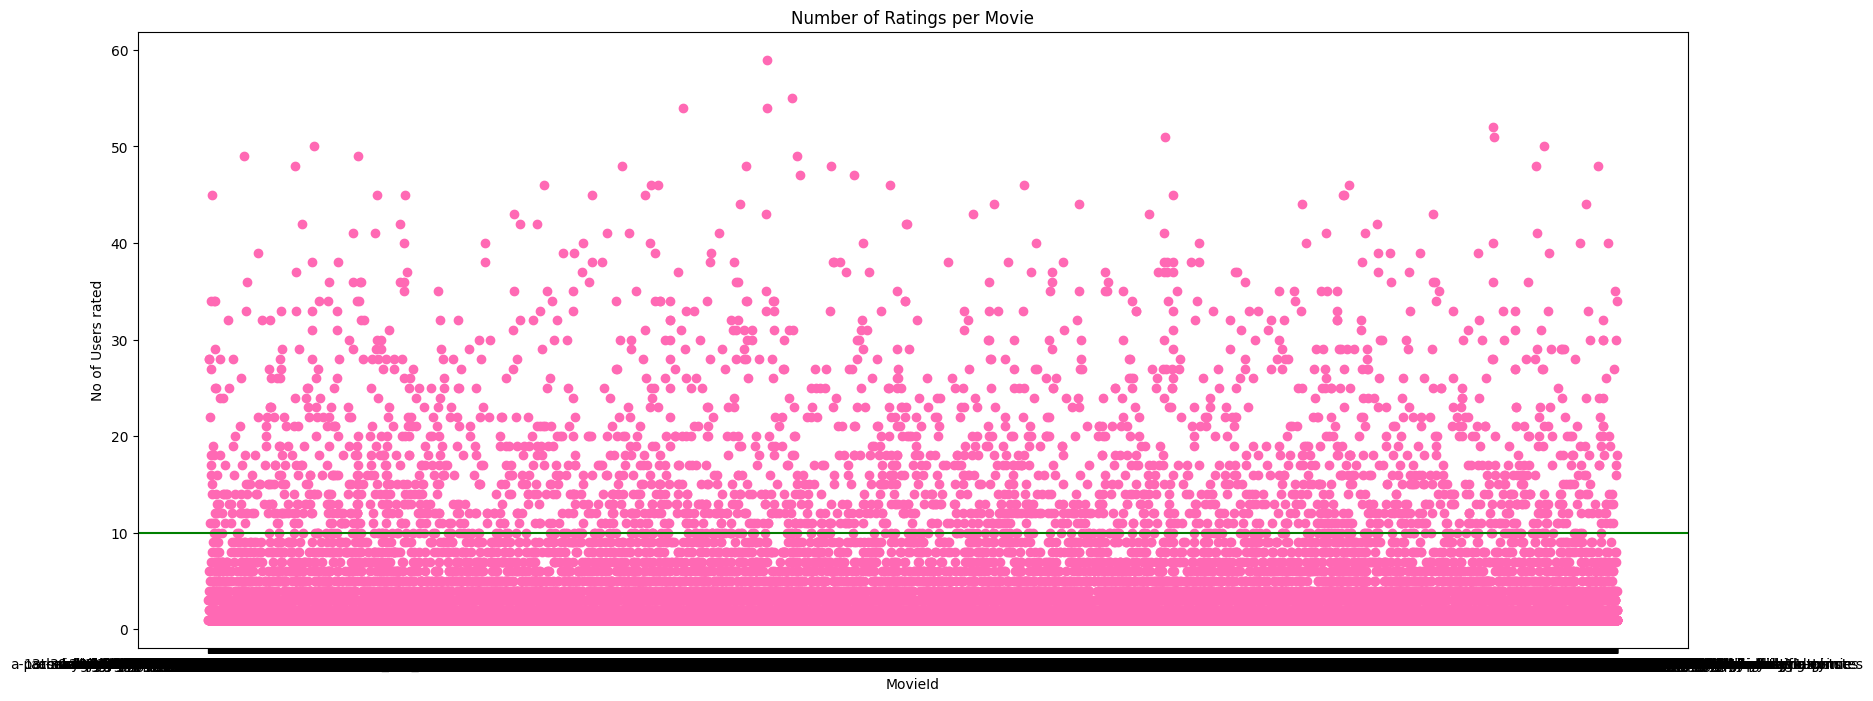

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,1,figsize=(20,8))
plt.scatter(no_movie_rated.index,no_movie_rated,color="hotpink")
plt.axhline(y=10,color="green")
plt.xlabel("MovieId")
plt.ylabel("No of Users rated")
plt.title("Number of Ratings per Movie", )


Text(0, 0.5, 'No of Users rated')

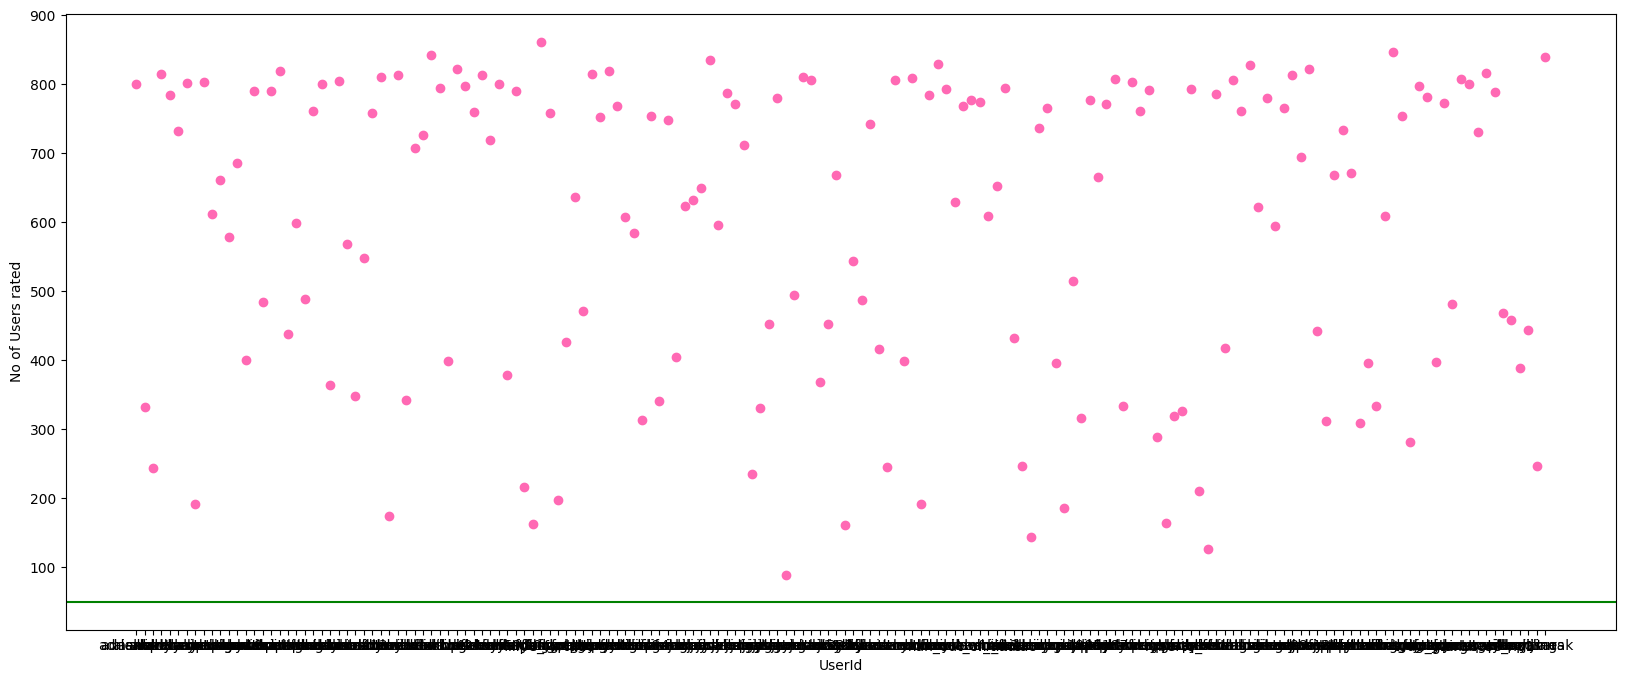

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,1,figsize=(20,8))
plt.scatter(no_user_rated.index,no_user_rated,color="hotpink")
plt.axhline(y=50,color="green")
plt.xlabel("UserId")
plt.ylabel("No of Movies rated")

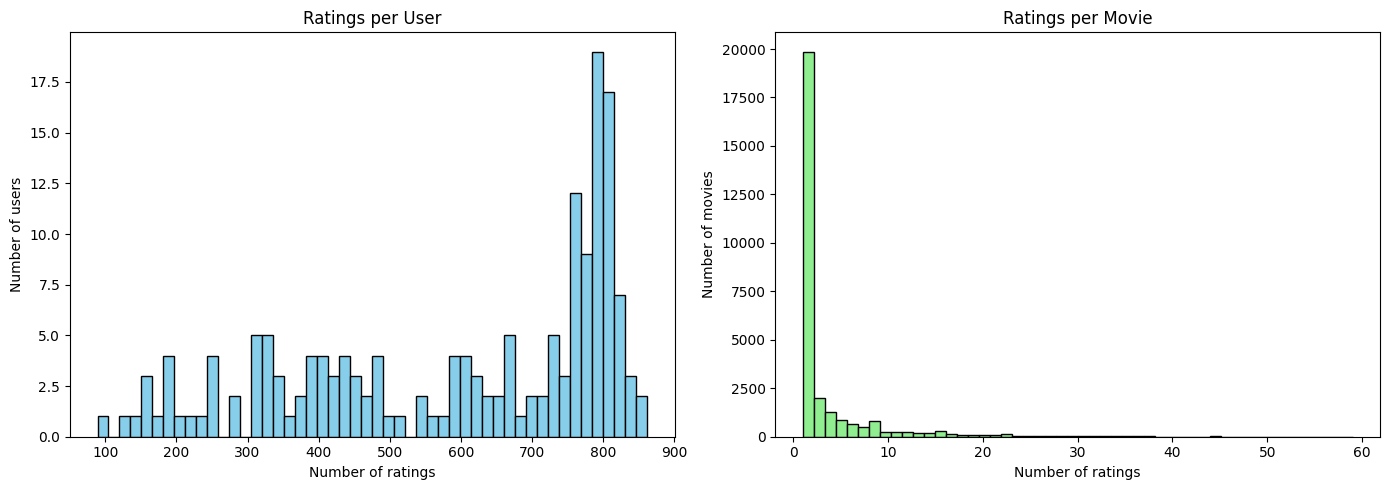

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Ratings per user
axes[0].hist(no_user_rated, bins=50, color="skyblue", edgecolor="black")
axes[0].set_title("Ratings per User")
axes[0].set_xlabel("Number of ratings")
axes[0].set_ylabel("Number of users")

# Ratings per movie
axes[1].hist(no_movie_rated, bins=50, color="lightgreen", edgecolor="black")
axes[1].set_title("Ratings per Movie")
axes[1].set_xlabel("Number of ratings")
axes[1].set_ylabel("Number of movies")

plt.tight_layout()
plt.show()


In [ ]:
from scipy.sparse import csc_matrix
csr_data=csc_matrix(final_dataset.values)

In [ ]:
print(csr_data)

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 110306 stored elements and shape (6206, 2003)>
  Coords	Values
  (251, 0)	10.0
  (278, 0)	7.0
  (415, 0)	1.0
  (427, 0)	8.0
  (455, 0)	9.0
  (533, 0)	10.0
  (612, 0)	8.0
  (774, 0)	9.0
  (779, 0)	8.0
  (784, 0)	10.0
  (892, 0)	9.0
  (1058, 0)	7.0
  (1075, 0)	9.0
  (1120, 0)	9.0
  (1239, 0)	5.0
  (1283, 0)	6.0
  (1433, 0)	8.0
  (1460, 0)	8.0
  (1603, 0)	8.0
  (1631, 0)	9.0
  (1663, 0)	7.0
  (1667, 0)	10.0
  (1734, 0)	5.0
  (1777, 0)	5.0
  (1798, 0)	9.0
  :	:
  (3510, 2002)	5.0
  (3520, 2002)	5.0
  (3624, 2002)	10.0
  (3919, 2002)	7.0
  (4175, 2002)	9.0
  (4342, 2002)	10.0
  (4403, 2002)	4.0
  (4409, 2002)	6.0
  (4412, 2002)	7.0
  (4471, 2002)	8.0
  (4499, 2002)	9.0
  (4524, 2002)	6.0
  (4683, 2002)	7.0
  (4879, 2002)	3.0
  (4888, 2002)	4.0
  (4899, 2002)	8.0
  (4952, 2002)	7.0
  (4993, 2002)	8.0
  (5103, 2002)	8.0
  (5429, 2002)	7.0
  (5594, 2002)	10.0
  (5713, 2002)	7.0
  (6041, 2002)	7.0
  (6134, 2002)	9.0
  (6189, 2002)

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(metric="cosine", algorithm="brute",n_neighbors=20,n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
movie_dataset2=movie_dataset[(movie_dataset["movie_title"].notnull()) & (movie_dataset["movie_id"].notnull())]


In [42]:
# movie_dataset2[movie_dataset["movie_id"]=="12-years-a-slave"]

In [ ]:
final_dataset.reset_index(inplace=True)

In [ ]:
def get_recommendation(movie_name):
  movie_list=movie_dataset2[movie_dataset2["movie_title"].str.contains(movie_name)]
  if len(movie_list):
    movie_idx=movie_list.iloc[0]["movie_id"]
    movie_idx=final_dataset[final_dataset["movie_id"]==movie_idx].index[0]
    distance,indices=knn.kneighbors(csr_data[movie_idx],n_neighbors=11)
    rec_movies_indices=sorted(list(zip(indices.squeeze().tolist(),distance.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recommended_movies=[]
    for val in rec_movies_indices:
      movie_idx=final_dataset.iloc[val[0]]["movie_id"]
      idx=movie_dataset2[movie_dataset2["movie_id"]==movie_idx].index
      recommended_movies.append({"Title":movie_dataset2.loc[idx]["movie_title"].values[0],"Distance":val[1]})
    df= pd.DataFrame(recommended_movies,index=range(1,11))
    return df
  else:
     return "Movie not found..."

In [ ]:
movie_dataset2[movie_dataset2["movie_id"]=="zootopia"]

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
192991,5fc884686758f69634f5ad6d,"[""Animation"",""Adventure"",""Family"",""Comedy""]",film-poster/1/9/2/4/1/0/192410-zootopia-0-230-...,tt2948356,http://www.imdb.com/title/tt2948356/maindetails,zootopia,Zootopia,en,"Determined to prove herself, Officer Judy Hopp...",72.573,"[""United States of America""]",2016-02-11,109.0,"[""English""]",269149.0,https://www.themoviedb.org/movie/269149/,7.7,13383.0,2016.0


In [ ]:
get_recommendation("12 Years a Slave")


,Title,Distance
1,The Purge: Election Year,0.875764
2,The Burning,0.872214
3,Gandhi,0.866950
4,No Strings Attached,0.865451
5,Resolution,0.865242
6,Best in Show,0.862803
7,Deadly Friend,0.859002
8,Blade Runner: Black Out 2022,0.849600
9,The Knight Before Christmas,0.845697
10,The Little Mermaid II: Return to the Sea,0.832437


In [ ]:
import gradio as gr

def recommended_movies(movie_name):
  df=get_recommendation(movie_name)
  if isinstance(df,pd.DataFrame):
    return df.to_string(index=False)
  else:
    return df
app=gr.Interface(
    fn=recommended_movies,
    inputs="text",
    outputs="text",
    title="Movie Recommendation System",
    description="Enter a movie name to get a list of recommended movies",

)
app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af4a91777b95310790.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Collabrative-Based filtering (User-based)

In Collaborative Filtering, we need to get the data into a matrix of users and the items they rated. As the data is in a DataFrame, pandas’ pivot method can be used to reshape the data around specified columns

*predict user behavior based on user similarities* for a specific movie using *K-nearest neighbors*

To find the rating **R** that a user **U** would give to an item **I**, the approach includes:

1. Finding users similar to U who have rated the item I
2. Calculating the rating R based the ratings of users found in the previous step

In [12]:
## User-Item interaction Matrix
final_dataset2=ratings_dataset.pivot_table(values="rating_val",columns="movie_id",index="user_id",fill_value=0.0)
final_dataset2.head()

movie_id,00-schneider-im-wendekreis-der-eidechse,00-schneider-jagd-auf-nihil-baxter,00mhz,01-00-am,025-sunset-red,03bypass,05-mm,08-15-part-2,0cm,0s-1s,...,zulu-dawn,zur-holle-mit-den-paukern,zus-zo,zvenigora,zwaar-verliefd,zwei-herren-im-anzug,zwei-nasen-tanken-super,zwei-weihnachtsmanner,zygote,zz-top-that-little-ol-band-from-texas
user_id,,,,,,,,,,,,,,,,,,,,,
007filmreviwer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007hertzrumble,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0o0o0o0o,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11122001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127gbh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
final_dataset2=final_dataset2.loc[no_user_rated[no_user_rated>50].index, :]

In [14]:
final_dataset2=final_dataset2.loc[:,no_movie_rated[no_movie_rated>10].index]

In [ ]:
final_dataset2

movie_id,user_id,10-cloverfield-lane,10-things-i-hate-about-you,10000-bc,101-dalmatians,102-dalmatians,11-22-63,12-angry-men,12-years-a-slave,127-hours,...,zola,zombi-child,zombie-flesh-eaters,zombieland,zombieland-double-tap,zookeeper,zoolander,zoolander-2,zootopia,zulu
0,007filmreviwer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,007hertzrumble,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12pt9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14ltobias,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1roomwithaview,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,zoltarak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,zombaid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2000,zombeaner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,zwergimbikini,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
##normalize ratings in userId-movieId matrix
avg_ratings=final_dataset2.mean(axis=1)
norm_final_dataset2=final_dataset2.sub(avg_ratings,axis=0)
norm_final_dataset2=norm_final_dataset2.fillna(0)

In [16]:
norm_final_dataset2.head()

movie_id,10-cloverfield-lane,10-things-i-hate-about-you,10000-bc,101-dalmatians,102-dalmatians,11-22-63,12-angry-men,12-years-a-slave,127-hours,13-assassins,...,zola,zombi-child,zombie-flesh-eaters,zombieland,zombieland-double-tap,zookeeper,zoolander,zoolander-2,zootopia,zulu
user_id,,,,,,,,,,,,,,,,,,,,,
007filmreviwer,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,...,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349,-0.072349
007hertzrumble,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,...,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838,-0.033838
12pt9,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,...,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824,-0.014824
14ltobias,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,...,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511,-0.038511
1roomwithaview,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,...,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582,-0.031582


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
## get user'S similarity using cosine similarity
similarities =cosine_similarity(final_dataset2)
cosine_similarity_df =pd.DataFrame(similarities,index=final_dataset2.index,columns=final_dataset2.index )
cosine_similarity_df.head()

user_id,007filmreviwer,007hertzrumble,12pt9,14ltobias,1roomwithaview,2manydvds,_cmpthreadale_,_dylarama_,_mohammed_,_ruckerish,...,zenxiu,zeroena,ziggystorstrand,zlatikevichius,zodokai,zoltarak,zombaid,zombeaner,zwergimbikini,zyopy
user_id,,,,,,,,,,,,,,,,,,,,,
007filmreviwer,1.000000,0.025812,0.0,0.065619,0.038696,0.015756,0.000000,0.001814,0.0,0.000000,...,0.000000,0.000000,0.039621,0.0,0.000000,0.016371,0.010669,0.044390,0.055829,0.000000
007hertzrumble,0.025812,1.000000,0.0,0.037748,0.000000,0.023227,0.000000,0.021397,0.0,0.055051,...,0.059794,0.000000,0.016224,0.0,0.039604,0.024133,0.023591,0.000000,0.000000,0.000000
12pt9,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.064612,0.000000,0.000000
14ltobias,0.065619,0.037748,0.0,1.000000,0.045272,0.025203,0.000000,0.012382,0.0,0.038837,...,0.000000,0.021694,0.000000,0.0,0.000000,0.030924,0.015603,0.027575,0.000000,0.010748
1roomwithaview,0.038696,0.000000,0.0,0.045272,1.000000,0.000000,0.012521,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.031274,0.000000,0.019161,0.022224,0.000000,0.025870


For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

In [ ]:
# Isolate the similarity  socres for user_1 and sort
user_similarity_series=cosine_similarity_df.loc["deathproof"]
orederd_similarities=user_similarity_series.sort_values(ascending=False)
## find the top 10 most similar users
nearest_neighbors =orederd_similarities[1:11].index

## Extract thr ratingd of the neighbors
neighbor_ratings=final_dataset2.reindex(nearest_neighbors)

##calculate the mean rating given bu the users nearest neighbors
print(neighbor_ratings["12-angry-men"].mean())


0.7


**utilize scikit-learn library to get the same result**

In [36]:
norm_final_dataset2.drop("12-angry-men",axis=1,inplace  =True)
target_user_x=norm_final_dataset2.loc[["deathproof"]]
other_users_y=final_dataset2["12-angry-men"]


In [37]:
other_users_x=norm_final_dataset2[other_users_y.notnull()]
other_users_y.dropna(inplace=True)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
user_knn=KNeighborsRegressor(metric="cosine",n_neighbors=10)
user_knn.fit(other_users_x,other_users_y)

KNeighborsRegressor(metric='cosine', n_neighbors=10)

In [39]:
prediction=user_knn.predict(target_user_x)

In [40]:
prediction

array([0.7])